# Pythonチャレンジ: 地震データを探る

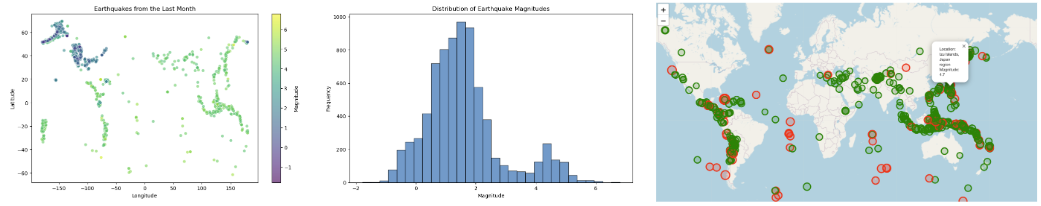

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

In [15]:
%pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\kuyou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### リクエストコード例

In [9]:
import pandas as pd
import requests

# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-05T05:29:06.697Z,31.702000,-104.16700,4.1419,1.6,ml,31.0,60.0,0.10000,0.30,...,2025-11-05T05:34:00.165Z,"53 km W of Mentone, Texas",earthquake,0.00,0.960428,0.200,22.0,automatic,tx,tx
1,2025-11-05T05:28:48.472Z,62.966600,-150.81150,117.4000,1.8,ml,NaN,NaN,NaN,0.26,...,2025-11-05T05:30:52.287Z,"52 km N of Petersville, Alaska",earthquake,NaN,1.100000,NaN,NaN,automatic,ak,ak
2,2025-11-05T05:16:22.542Z,57.091400,-156.98690,33.4000,1.9,ml,NaN,NaN,NaN,1.05,...,2025-11-05T05:18:16.729Z,"53 km SSE of Ugashik, Alaska",earthquake,NaN,0.700000,NaN,NaN,automatic,ak,ak
3,2025-11-05T05:14:42.880Z,36.969002,-121.62133,4.5600,1.3,md,13.0,68.0,0.03431,0.07,...,2025-11-05T05:32:18.800Z,"6 km SW of Gilroy, CA",earthquake,0.28,0.690000,0.240,14.0,automatic,nc,nc
4,2025-11-05T04:38:29.871Z,44.560600,-112.20010,12.6560,2.7,ml,44.0,37.0,0.32200,0.74,...,2025-11-05T04:47:55.040Z,"22 km N of Spencer, Idaho",earthquake,1.50,6.618000,0.033,120.0,reviewed,us,us


## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

In [ ]:
data

In [14]:
import pandas as pd

#CSVデータをUSGSから読み込み
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

#地震の総数
total_earthquakes = len(df)

#最大マグニチュードの地震
max_mag_row = df.loc[df['mag'].idxmax()]
max_mag = max_mag_row['mag']
max_mag_place = max_mag_row['place']
max_mag_time = max_mag_row['time']

#日本で発生した地震の数
# "Japan" を含む場所を検索
japan_quakes = df[df['place'].str.contains("Japan", case=False, na=False)]
japan_quake_count = len(japan_quakes)

#結果表示
print("過去1か月の地震の総数:", total_earthquakes)
print("最大マグニチュードの地震:")
print("   マグニチュード:", max_mag)
print("   発生場所:", max_mag_place)
print("   発生日時(UTC):", max_mag_time)
print("日本での地震の数:", japan_quake_count)


過去1か月の地震の総数: 7626
最大マグニチュードの地震:
   マグニチュード: 7.6
   発生場所: Drake Passage
   発生日時(UTC): 2025-10-10T20:29:20.591Z
日本での地震の数: 50


**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


In [1]:
import pandas as pd

# CSVデータを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# マグニチュード6.0超の地震を抽出
strong_quakes = df[df["mag"] > 6.0]

# ① 各地震の情報をforループで表示
print("=== マグニチュード6.0超の地震一覧 ===")
for index, row in strong_quakes.iterrows():
    place = row["place"]
    mag = row["mag"]
    time = row["time"]
    print(f"発生位置: {place}\nマグニチュード: {mag}\n発生時刻(UTC): {time}\n")

# ② 総数を表示
count = len(strong_quakes)
print("=== 統計 ===")
print(f"マグニチュード6.0超の地震の総数: {count}")


=== マグニチュード6.0超の地震一覧 ===
発生位置: 121 km E of Yamada, Japan
マグニチュード: 6.4
発生時刻(UTC): 2025-11-09T08:54:36.991Z

発生位置: 126 km E of Yamada, Japan
マグニチュード: 6.8
発生時刻(UTC): 2025-11-09T08:03:37.808Z

発生位置: 155 km SE of Petropavlovsk-Kamchatsky, Russia
マグニチュード: 6.1
発生時刻(UTC): 2025-11-03T08:44:43.471Z

発生位置: 22 km WSW of Khulm, Afghanistan
マグニチュード: 6.3
発生時刻(UTC): 2025-11-02T20:29:02.028Z

発生位置: Banda Sea
マグニチュード: 6.4
発生時刻(UTC): 2025-10-28T14:40:18.476Z

発生位置: 162 km E of Beauséjour, Guadeloupe
マグニチュード: 6.5
発生時刻(UTC): 2025-10-27T12:38:40.311Z

発生位置: 59 km NW of Pante Makasar, Timor Leste
マグニチュード: 6.2
発生時刻(UTC): 2025-10-26T17:04:25.645Z

発生位置: 194 km WNW of Abepura, Indonesia
マグニチュード: 6.5
発生時刻(UTC): 2025-10-16T05:48:55.498Z

発生位置: Drake Passage
マグニチュード: 6.3
発生時刻(UTC): 2025-10-16T01:42:32.318Z

=== 統計 ===
マグニチュード6.0超の地震の総数: 9


**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


In [2]:
import pandas as pd

# USGS地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

df = df.dropna(subset=["depth"])

# ① 全地震の平均深度
average_depth = df["depth"].mean()

# ② 深さカテゴリごとの分類
shallow = df[df["depth"] < 70]
intermediate = df[(df["depth"] >= 70) & (df["depth"] <= 300)]
deep = df[df["depth"] > 300]

# ③ 件数カウント
shallow_count = len(shallow)
intermediate_count = len(intermediate)
deep_count = len(deep)

# 結果表示
print("=== 地震深度の統計 ===")
print(f"全地震の平均深度: {average_depth:.2f} km")
print(f"浅い地震 (<70km): {shallow_count} 件")
print(f"中間深度地震 (70–300km): {intermediate_count} 件")
print(f"深い地震 (>300km): {deep_count} 件")


=== 地震深度の統計 ===
全地震の平均深度: 21.40 km
浅い地震 (<70km): 6742 件
中間深度地震 (70–300km): 494 件
深い地震 (>300km): 60 件


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

In [3]:
import pandas as pd
from datetime import timezone, timedelta

# USGS地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# ======== ① 全地震の平均深度 ========
df = df.dropna(subset=["depth"])
average_depth = df["depth"].mean()

# ======== ② 深さカテゴリごとの件数 ========
shallow = df[df["depth"] < 70]
intermediate = df[(df["depth"] >= 70) & (df["depth"] <= 300)]
deep = df[df["depth"] > 300]

shallow_count = len(shallow)
intermediate_count = len(intermediate)
deep_count = len(deep)

# ======== ③ タイムスタンプを日本時間に変換 ========
# time列をdatetime型に変換（UTC基準）
df["time"] = pd.to_datetime(df["time"], utc=True)

# 日本時間（JST, UTC+9）に変換
df["time_jst"] = df["time"].dt.tz_convert("Asia/Tokyo")

# ======== ④ 最も早い地震と最新の地震 ========
earliest_quake = df.loc[df["time"].idxmin()]
latest_quake = df.loc[df["time"].idxmax()]

# ======== ⑤ 結果出力 ========
print("=== 地震深度の統計 ===")
print(f"全地震の平均深度: {average_depth:.2f} km")
print(f"浅い地震 (<70km): {shallow_count} 件")
print(f"中間深度地震 (70–300km): {intermediate_count} 件")
print(f"深い地震 (>300km): {deep_count} 件\n")

print("=== タイムスタンプ情報 ===")
print(f"最も早い地震（UTC）: {earliest_quake['time']}")
print(f"最も早い地震（JST）: {earliest_quake['time_jst']}")
print(f"最も遅い地震（UTC）: {latest_quake['time']}")
print(f"最も遅い地震（JST）: {latest_quake['time_jst']}")


=== 地震深度の統計 ===
全地震の平均深度: 21.40 km
浅い地震 (<70km): 6742 件
中間深度地震 (70–300km): 494 件
深い地震 (>300km): 60 件

=== タイムスタンプ情報 ===
最も早い地震（UTC）: 2025-10-13 03:54:17.228000+00:00
最も早い地震（JST）: 2025-10-13 12:54:17.228000+09:00
最も遅い地震（UTC）: 2025-11-12 03:40:46.667000+00:00
最も遅い地震（JST）: 2025-11-12 12:40:46.667000+09:00


**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

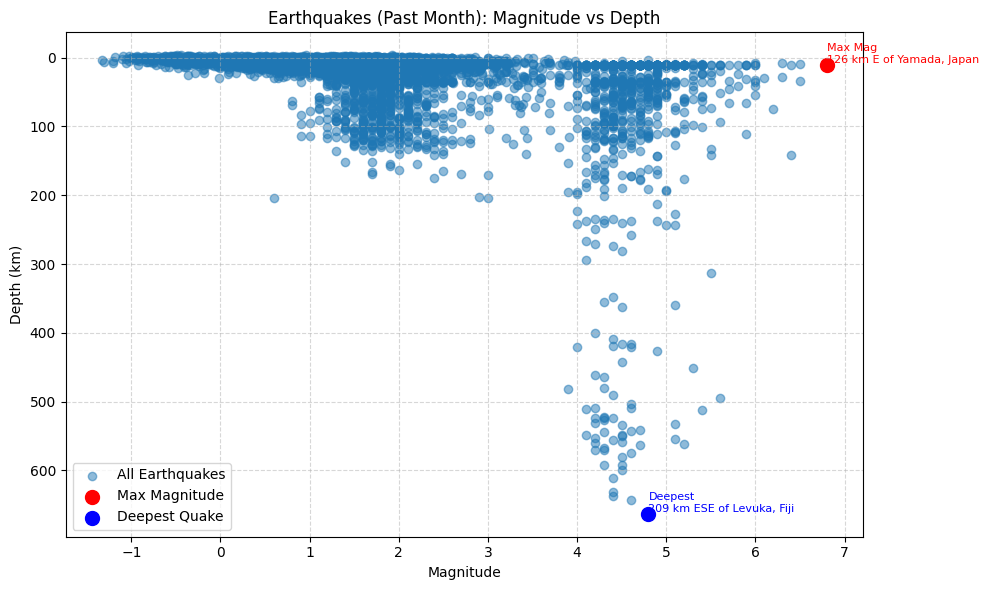

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# USGS地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# 欠損値を除く
df = df.dropna(subset=["mag", "depth", "place"])

# 最大マグニチュードと最大深度の地震を特定
max_mag_row = df.loc[df["mag"].idxmax()]
max_depth_row = df.loc[df["depth"].idxmax()]

# 散布図を作成
plt.figure(figsize=(10, 6))
plt.scatter(df["mag"], df["depth"], alpha=0.5, label="All Earthquakes")

# 最大マグニチュードの地震を赤で強調
plt.scatter(max_mag_row["mag"], max_mag_row["depth"], color="red", s=100, label="Max Magnitude")
plt.text(max_mag_row["mag"], max_mag_row["depth"], f"Max Mag\n{max_mag_row['place']}", 
         fontsize=8, color="red", ha="left", va="bottom")

# 最も深い地震を青で強調
plt.scatter(max_depth_row["mag"], max_depth_row["depth"], color="blue", s=100, label="Deepest Quake")
plt.text(max_depth_row["mag"], max_depth_row["depth"], f"Deepest\n{max_depth_row['place']}", 
         fontsize=8, color="blue", ha="left", va="bottom")

# 軸ラベル・タイトル
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.title("Earthquakes (Past Month): Magnitude vs Depth")
plt.gca().invert_yaxis()  # 深いほど下になるよう反転
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

In [5]:
import pandas as pd
import requests
import folium
from datetime import datetime, timedelta
# --- 1. USGSから地震データを取得する関数 ---
def fetch_earthquake_data(starttime, endtime, minmagnitude=0):
    """
    USGSのAPIから地震データを取得します。
    :param starttime: 検索開始日時 (YYYY-MM-DD形式)
    :param endtime: 検索終了日時 (YYYY-MM-DD形式)
    :param minmagnitude: 最小マグニチュード
    :return: 地震データのDataFrame
    """
    # USGS APIのエンドポイント (直近30日間のすべての地震を取得する例)
    API_URL = "https://earthquake.usgs.gov/fdsnws/event/1/query"
    # リクエストパラメータ
    params = {
        "format": "geojson",
        "starttime": starttime,
        "endtime": endtime,
        "minmagnitude": minmagnitude,
        "orderby": "time"
    }
    try:
        response = requests.get(API_URL, params=params)
        response.raise_for_status() # HTTPエラーが発生した場合に例外を発生させる
        data = response.json()
        # データを整形してDataFrameに格納
        earthquakes = []
        for feature in data.get('features', []):
            props = feature['properties']
            geometry = feature['geometry']
            # 緯度、経度、深さ
            longitude, latitude, depth = geometry['coordinates']
            # データの整形
            eq_data = {
                'magnitude': props['mag'],
                'place': props['place'],
                'time': props['time'], # Unix Time (ミリ秒)
                'latitude': latitude,
                'longitude': longitude,
                'depth_km': depth
            }
            earthquakes.append(eq_data)
        if not earthquakes:
            print("指定された期間・条件で地震データは見つかりませんでした。")
            return pd.DataFrame()
        df = pd.DataFrame(earthquakes)
        # 時刻をdatetimeオブジェクトに変換し、日本時間 (JST, UTC+9) に変換
        df['datetime_utc'] = pd.to_datetime(df['time'], unit='ms', utc=True)
        # UTCからJSTへ変換 (日本日付表示のため)
        df['datetime_jst'] = df['datetime_utc'].dt.tz_convert('Asia/Tokyo')
        df['date_jst'] = df['datetime_jst'].dt.strftime('%Y-%m-%d %H:%M:%S JST')
        return df
    except requests.exceptions.RequestException as e:
        print(f"データの取得中にエラーが発生しました: {e}")
        return pd.DataFrame()
# --- 2. マグニチュードに基づいて色とサイズを決定する関数 ---
def get_style(magnitude):
    """
    マグニチュードに基づいてマーカーの色とサイズを決定します。
    """
    # 色分けのロジック
    if magnitude < 4.0:
        color = 'green'
    elif 4.0 <= magnitude <= 6.0:
        color = 'gold' # foliumでは'yellow'よりも'gold'の方が視認性が良い場合があります
    else: # magnitude > 6.0
        color = 'red'
    # サイズ (マグニチュードを強調するため)
    radius = max(3, magnitude * 1.5)
    return color, radius
# --- 3. メイン処理 ---
# 検索期間: 今日から30日前まで
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
START = start_date.strftime('%Y-%m-%d')
END = end_date.strftime('%Y-%m-%d')
print(f"データ取得期間: {START} から {END} (全マグニチュード)")
# データの取得
eq_df = fetch_earthquake_data(START, END, minmagnitude=0)
if not eq_df.empty:
    print(f"--- {len(eq_df)}件の地震データを取得しました。---")
    # :地球_アフリカ: 地図の初期化 (世界の中央付近)
    m = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron") # 視認性の高いタイルを使用
    # 地震データを地図上にプロット
    for index, row in eq_df.iterrows():
        # 2. マグニチュードに基づいたスタイル設定
        color, radius = get_style(row['magnitude'])
        # 3. ツールチップのHTMLコンテンツ作成
        tooltip_html = f"""
        <b>マグニチュード:</b> {row['magnitude']:.1f}<br>
        <b>場所:</b> {row['place']}<br>
        <b>日本日付:</b> {row['date_jst']}<br>
        <b>深さ:</b> {row['depth_km']:.2f} km
        """
        # マーカーを追加
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=radius,
            color=color, # 枠線
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            # ツールチップの追加
            tooltip=tooltip_html
        ).add_to(m)
    # 凡例の追加 (カスタムHTMLを使用)
    # folium.Legendを利用すると日本語が表示されないため、HTMLで直接記述
    legend_html = """
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 150px; height: 120px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity:0.9;">
        &nbsp; <b>マグニチュード凡例</b> <br>
        &nbsp; <i style="background:green; color:white; border-radius:50%;">&nbsp;&nbsp;&nbsp;</i> &nbsp; < 4.0 <br>
        &nbsp; <i style="background:gold; color:white; border-radius:50%;">&nbsp;&nbsp;&nbsp;</i> &nbsp; 4.0 - 6.0 <br>
        &nbsp; <i style="background:red; color:white; border-radius:50%;">&nbsp;&nbsp;&nbsp;</i> &nbsp; > 6.0
    </div>
    """
    m.get_root().html.add_child(folium.Element(legend_html))
    # HTMLファイルとして保存
    map_filename = "global_earthquake_map.html"
    m.save(map_filename)
    print(f"\n:チェックマーク_緑: 地図が正常に作成され、'{map_filename}' として保存されました。")
    print("このファイルをWebブラウザで開いて、インタラクティブな地図を確認してください。")
else:
    print("\n:警告: データが取得できなかったため、地図は作成されませんでした。")
import pandas as pd
import requests
import folium
from datetime import datetime, timedelta
# --- 1. USGSから地震データを取得する関数 ---
def fetch_earthquake_data(starttime, endtime, minmagnitude=0):
    """
    USGSのAPIから地震データを取得します。
    :param starttime: 検索開始日時 (YYYY-MM-DD形式)
    :param endtime: 検索終了日時 (YYYY-MM-DD形式)
    :param minmagnitude: 最小マグニチュード
    :return: 地震データのDataFrame
    """
    # USGS APIのエンドポイント (直近30日間のすべての地震を取得する例)
    API_URL = "https://earthquake.usgs.gov/fdsnws/event/1/query"
    # リクエストパラメータ
    params = {
        "format": "geojson",
        "starttime": starttime,
        "endtime": endtime,
        "minmagnitude": minmagnitude,
        "orderby": "time"
    }
    try:
        response = requests.get(API_URL, params=params)
        response.raise_for_status() # HTTPエラーが発生した場合に例外を発生させる
        data = response.json()
        # データを整形してDataFrameに格納
        earthquakes = []
        for feature in data.get('features', []):
            props = feature['properties']
            geometry = feature['geometry']
            # 緯度、経度、深さ
            longitude, latitude, depth = geometry['coordinates']
            # データの整形
            eq_data = {
                'magnitude': props['mag'],
                'place': props['place'],
                'time': props['time'], # Unix Time (ミリ秒)
                'latitude': latitude,
                'longitude': longitude,
                'depth_km': depth
            }
            earthquakes.append(eq_data)
        if not earthquakes:
            print("指定された期間・条件で地震データは見つかりませんでした。")
            return pd.DataFrame()
        df = pd.DataFrame(earthquakes)
        # 時刻をdatetimeオブジェクトに変換し、日本時間 (JST, UTC+9) に変換
        df['datetime_utc'] = pd.to_datetime(df['time'], unit='ms', utc=True)
        # UTCからJSTへ変換 (日本日付表示のため)
        df['datetime_jst'] = df['datetime_utc'].dt.tz_convert('Asia/Tokyo')
        df['date_jst'] = df['datetime_jst'].dt.strftime('%Y-%m-%d %H:%M:%S JST')
        return df
    except requests.exceptions.RequestException as e:
        print(f"データの取得中にエラーが発生しました: {e}")
        return pd.DataFrame()
# --- 2. マグニチュードに基づいて色とサイズを決定する関数 ---
def get_style(magnitude):
    """
    マグニチュードに基づいてマーカーの色とサイズを決定します。
    """
    # 色分けのロジック
    if magnitude < 4.0:
        color = 'green'
    elif 4.0 <= magnitude <= 6.0:
        color = 'gold' # foliumでは'yellow'よりも'gold'の方が視認性が良い場合があります
    else: # magnitude > 6.0
        color = 'red'
    # サイズ (マグニチュードを強調するため)
    radius = max(3, magnitude * 1.5)
    return color, radius
# --- 3. メイン処理 ---
# 検索期間: 今日から30日前まで
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
START = start_date.strftime('%Y-%m-%d')
END = end_date.strftime('%Y-%m-%d')
print(f"データ取得期間: {START} から {END} (全マグニチュード)")
# データの取得
eq_df = fetch_earthquake_data(START, END, minmagnitude=0)
if not eq_df.empty:
    print(f"--- {len(eq_df)}件の地震データを取得しました。---")
    # :地球_アフリカ: 地図の初期化 (世界の中央付近)
    m = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron") # 視認性の高いタイルを使用
    # 地震データを地図上にプロット
    for index, row in eq_df.iterrows():
        # 2. マグニチュードに基づいたスタイル設定
        color, radius = get_style(row['magnitude'])
        # 3. ツールチップのHTMLコンテンツ作成
        tooltip_html = f"""
        <b>マグニチュード:</b> {row['magnitude']:.1f}<br>
        <b>場所:</b> {row['place']}<br>
        <b>日本日付:</b> {row['date_jst']}<br>
        <b>深さ:</b> {row['depth_km']:.2f} km
        """
        # マーカーを追加
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=radius,
            color=color, # 枠線
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            # ツールチップの追加
            tooltip=tooltip_html
        ).add_to(m)
    # 凡例の追加 (カスタムHTMLを使用)
    # folium.Legendを利用すると日本語が表示されないため、HTMLで直接記述
    legend_html = """
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 150px; height: 120px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity:0.9;">
        &nbsp; <b>マグニチュード凡例</b> <br>
        &nbsp; <i style="background:green; color:white; border-radius:50%;">&nbsp;&nbsp;&nbsp;</i> &nbsp; < 4.0 <br>
        &nbsp; <i style="background:gold; color:white; border-radius:50%;">&nbsp;&nbsp;&nbsp;</i> &nbsp; 4.0 - 6.0 <br>
        &nbsp; <i style="background:red; color:white; border-radius:50%;">&nbsp;&nbsp;&nbsp;</i> &nbsp; > 6.0
    </div>
    """
    m.get_root().html.add_child(folium.Element(legend_html))
    # HTMLファイルとして保存
    map_filename = "global_earthquake_map.html"
    m.save(map_filename)
    print(f"\n:チェックマーク_緑: 地図が正常に作成され、'{map_filename}' として保存されました。")
    print("このファイルをWebブラウザで開いて、インタラクティブな地図を確認してください。")
else:
    print("\n:警告: データが取得できなかったため、地図は作成されませんでした。")

データ取得期間: 2025-10-13 から 2025-11-12 (全マグニチュード)
--- 6946件の地震データを取得しました。---

:チェックマーク_緑: 地図が正常に作成され、'global_earthquake_map.html' として保存されました。
このファイルをWebブラウザで開いて、インタラクティブな地図を確認してください。
データ取得期間: 2025-10-13 から 2025-11-12 (全マグニチュード)
--- 6946件の地震データを取得しました。---

:チェックマーク_緑: 地図が正常に作成され、'global_earthquake_map.html' として保存されました。
このファイルをWebブラウザで開いて、インタラクティブな地図を確認してください。


日本語サマリー

今回のプログラミングは全体的にかなり難しく、自分一人ではできず周りの友達やAIに頼らないとできなかった。今後もプログラミングに触れる機会はとても多いと思うので少しずつできるようになっていきたいと思う。今回地震の分析をして、やはり日本は自身が他国にくらべて結構発生しているなと感じた。さすがは地震大国といったところだろうか。深さについては、ほとんどの地震は200km以内で発生していることが分かった。

# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**